In [11]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
product_descriptions = pd.read_csv('./data/product_descriptions.csv/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [5]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

c:\projects\product-rec\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


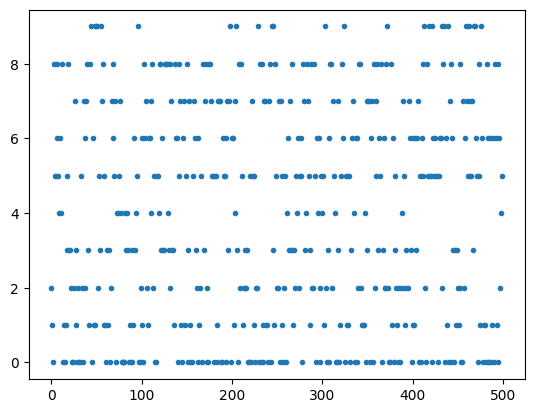

In [12]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [14]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 post
 outdoor
 frame
 steel
 aluminum
 metal
 patio
 ft
 use
 finish
Cluster 1:
 bamboo
 rug
 ft
 shades
 vary
 natural
 fencing
 wood
 resistant
 product
Cluster 2:
 water
 heater
 tank
 air
 toilet
 flush
 shower
 filter
 spray
 valve
Cluster 3:
 brush
 tool
 easy
 paint
 dust
 roller
 pet
 water
 garage
 concrete
Cluster 4:
 volt
 power
 20
 battery
 lithium
 led
 m12
 ion
 light
 max
Cluster 5:
 speed
 fan
 easy
 help
 adjustable
 grip
 air
 control
 lawn
 blower
Cluster 6:
 energy
 light
 ft
 cycle
 door
 air
 cu
 oven
 wash
 easy
Cluster 7:
 wall
 finish
 home
 piece
 tile
 use
 easy
 ft
 look
 color
Cluster 8:
 wood
 65
 proposition
 nbsp
 residents
 california
 door
 metal
 design
 easy
Cluster 9:
 cutting
 tree
 pruner
 watering
 blade
 pruning
 blades
 pole
 branches
 saw


In [15]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


In [16]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]


In [17]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[8]


In [18]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [21]:
print("Cluster ID:")
Y = vectorizer.transform(["aluminum water bottle for kids"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]
